# Sorting Algorithms

In [155]:
import matplotlib.pyplot as plt
import random

In [2]:
def count_calls(counter):
    def decorator(func):
        def wrapper(*args):
            params = f"{args}"
            counter[params] = 1 if params not in counter else counter[params]+1
            return func(*args)
        return wrapper
    return decorator

In [3]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

In [223]:
test_num = 20

## Bubble-Sort

### Algorithm

In [241]:
def bubble_sort(L):
    counter = {}
    @count_calls(counter)
    def bs(L):
        if len(L) == 1:
            return L
        else:
            param = f"({L},)"
            for i in range(1,len(L)):
                if L[i] < L[i-1]:
                    L[i],L[i-1] = L[i-1],L[i]
                counter[param] = 1 if param not in counter else counter[param]+1
            return bs(L[:-1]) + L[-1:]
    return bs(L[:]),counter

### Growth

T(n) = **O(N^2)**

{1: 1, 2: 3, 3: 6, 4: 10, 5: 15, 6: 21, 7: 28, 8: 36, 9: 45, 10: 55, 11: 66, 12: 78, 13: 91, 14: 105, 15: 120, 16: 136, 17: 153, 18: 171, 19: 190, 20: 210}


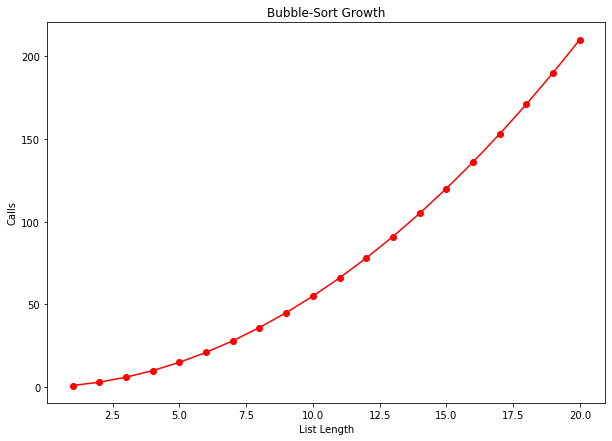

In [257]:
growth_bs = {}
l = []
for i in range(1,test_num+1):
    l.append(random.randint(1,test_num+1))
    r,counts = bubble_sort(l[:])
    growth_bs[i] = get_total(counts)
print(growth_bs)
plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_bs.items()))

plt.plot(values, calls,'r-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Bubble-Sort Growth")

plt.show()

## Selection-Sort

### Algorithm

In [243]:
def selection_sort(L):
    counter = {}
    @count_calls(counter)
    def bs(L):
        if len(L) == 1:
            return L
        else:
            param = f"({L},)"
            for i in range(len(L)-1,0,-1):
                if L[i] < L[i-1]:
                    L[i],L[i-1] = L[i-1],L[i]
                counter[param] = 1 if param not in counter else counter[param]+1
            return L[:1] + bs(L[1:])
    return bs(L[:]),counter

### Growth

T(n) = **O(N^2)**

{1: 1, 2: 3, 3: 6, 4: 10, 5: 15, 6: 21, 7: 28, 8: 36, 9: 45, 10: 55, 11: 66, 12: 78, 13: 91, 14: 105, 15: 120, 16: 136, 17: 153, 18: 171, 19: 190, 20: 210}


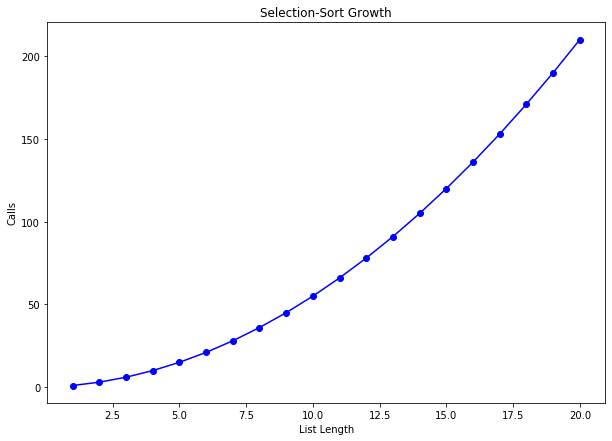

In [258]:
growth_ss = {}
l = []
for i in range(1,test_num+1):
    l.append(random.randint(1,test_num+1))
    r,counts = selection_sort(l[:])
    growth_ss[i] = get_total(counts)
print(growth_ss)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_ss.items()))

plt.plot(values, calls,'b-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Selection-Sort Growth")

plt.show()

## Merge_sort

### Algorithm

In [197]:
def merge_sort(L):
    # pre difinition
    counter = {}
    @count_calls(counter)
    def ms(L):
        param = f"({L},)"
        def merge(left,right):
            merge_count = 0
            result = []
            i,j = 0,0
            while i < len(left) and j < len(right):
                if left[i] < right[j]:
                    result.append(left[i])
                    i+=1
                else:
                    result.append(right[j])
                    j+=1
                merge_count+=1
            while(i < len(left)):
                result.append(left[i])
                i+=1
                merge_count+=1
            while(j < len(right)):
                result.append(right[j])
                j+=1
                merge_count+=1
            counter[param] = merge_count if param not in counter else counter[param]+merge_count
            return result
        #ms
        if len(L) < 2:
            return L[:]
        else:
            mid = len(L)//2
            left = ms(L[:mid])
            right = ms(L[mid:])
            return merge(left, right)
    # main func
    return ms(L[:]), counter

### Growth

T(n) = **O(NlogN)**

{1: 1, 2: 5, 3: 10, 4: 15, 5: 21, 6: 27, 7: 33, 8: 39, 9: 46, 10: 53, 11: 60, 12: 67, 13: 74, 14: 81, 15: 88, 16: 95, 17: 103, 18: 111, 19: 119, 20: 127}


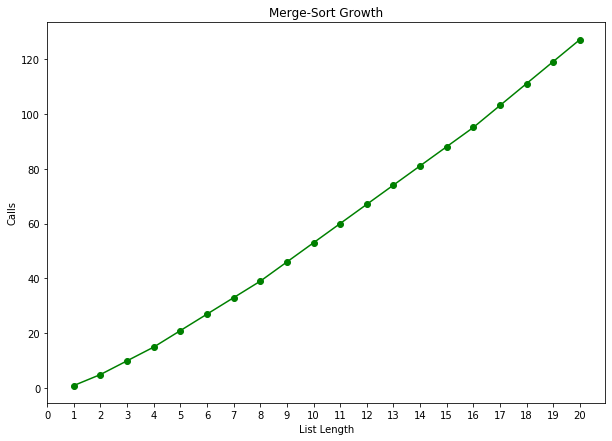

In [256]:
growth_ms = {}
l = []
for i in range(1,test_num+1):
    l.append(random.randint(1,test_num+1))
    r,counts = merge_sort(l[:])
    growth_ms[i] = get_total(counts)
print(growth_ms)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_ms.items()))

plt.plot(values, calls,'g-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Merge-Sort Growth")
plt.xticks(list(range(0,test_num+1)))

plt.show()

## Comparision

**Merge-Sort** : **O(nlogn)**  
**Selection-Sort** : **O(n^2)**

Selection: {1: 1, 2: 3, 3: 6, 4: 10, 5: 15, 6: 21, 7: 28, 8: 36, 9: 45, 10: 55, 11: 66, 12: 78, 13: 91, 14: 105, 15: 120, 16: 136, 17: 153, 18: 171, 19: 190, 20: 210}
MergeSort: {1: 1, 2: 5, 3: 10, 4: 15, 5: 21, 6: 27, 7: 33, 8: 39, 9: 46, 10: 53, 11: 60, 12: 67, 13: 74, 14: 81, 15: 88, 16: 95, 17: 103, 18: 111, 19: 119, 20: 127}


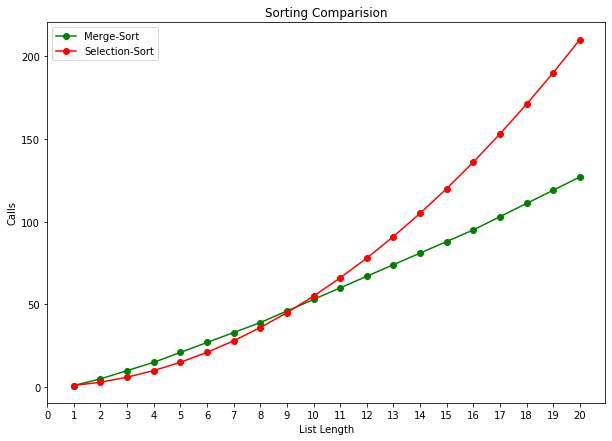

In [259]:
print("Selection:",growth_ss)
print("MergeSort:",growth_ms)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_ms.items()))
values2, calls2 = zip(*sorted(growth_ss.items()))

plt.plot(values, calls,'g-o',values2,calls2,'r-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Sorting Comparision")
plt.xticks(list(range(0,test_num+1)))
plt.legend(['Merge-Sort','Selection-Sort'])

plt.show()